In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "household_power_consumption.txt"
data = pd.read_csv(file_path, sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'])

data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d/%m/%Y %H:%M:%S')
mask = (data['Datetime'] >= '2006-12-01') & (data['Datetime'] <= '2009-11-30')
filtered_data = data.loc[mask]  

filtered_data = filtered_data.dropna()

for column in filtered_data.columns[1:]:
    filtered_data[column] = filtered_data[column].astype(float)

sns.set(style='whitegrid')


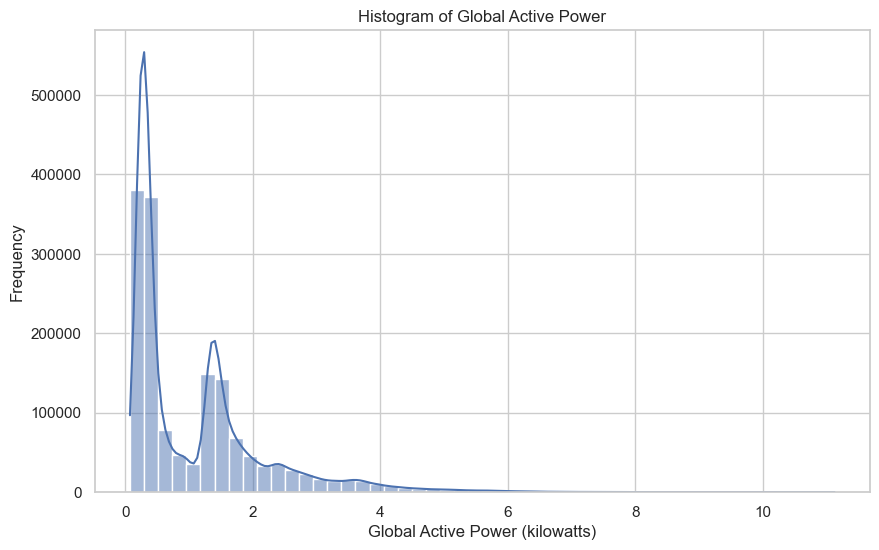

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Global_active_power'], bins=50, kde=True)
plt.title('Histogram of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

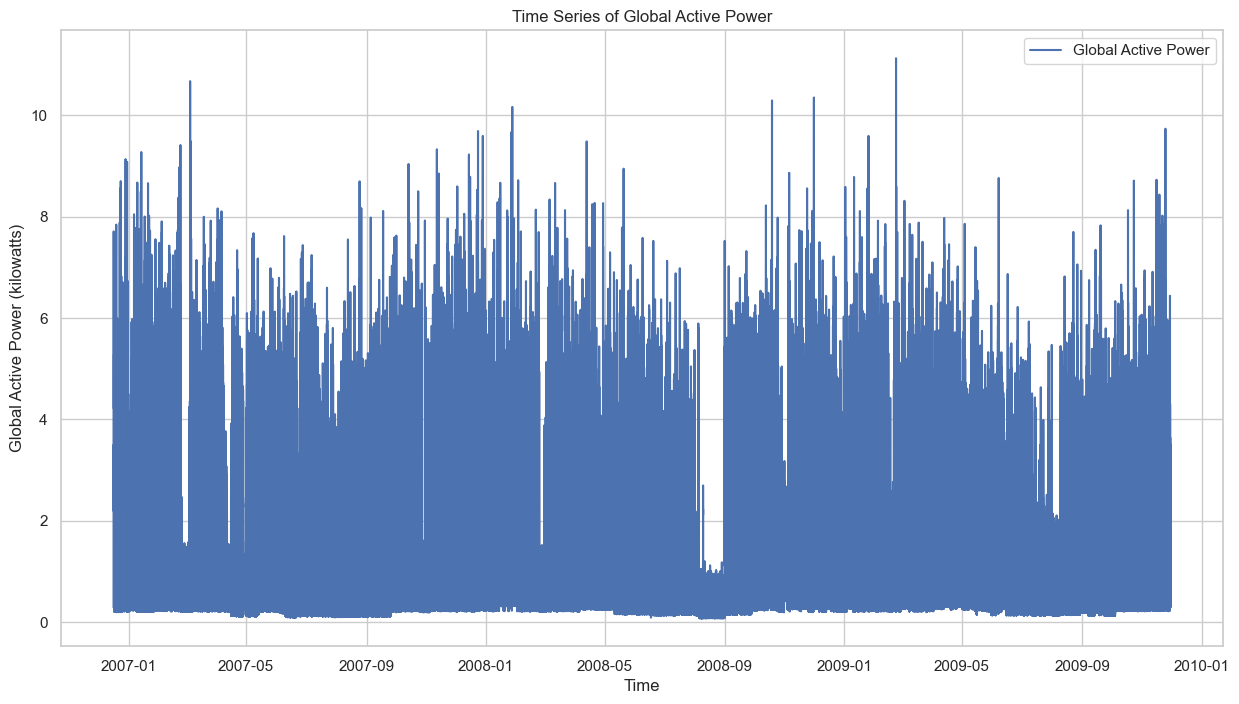

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(filtered_data['Datetime'], filtered_data['Global_active_power'], label='Global Active Power')
plt.title('Time Series of Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

C:\Users\devpa\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


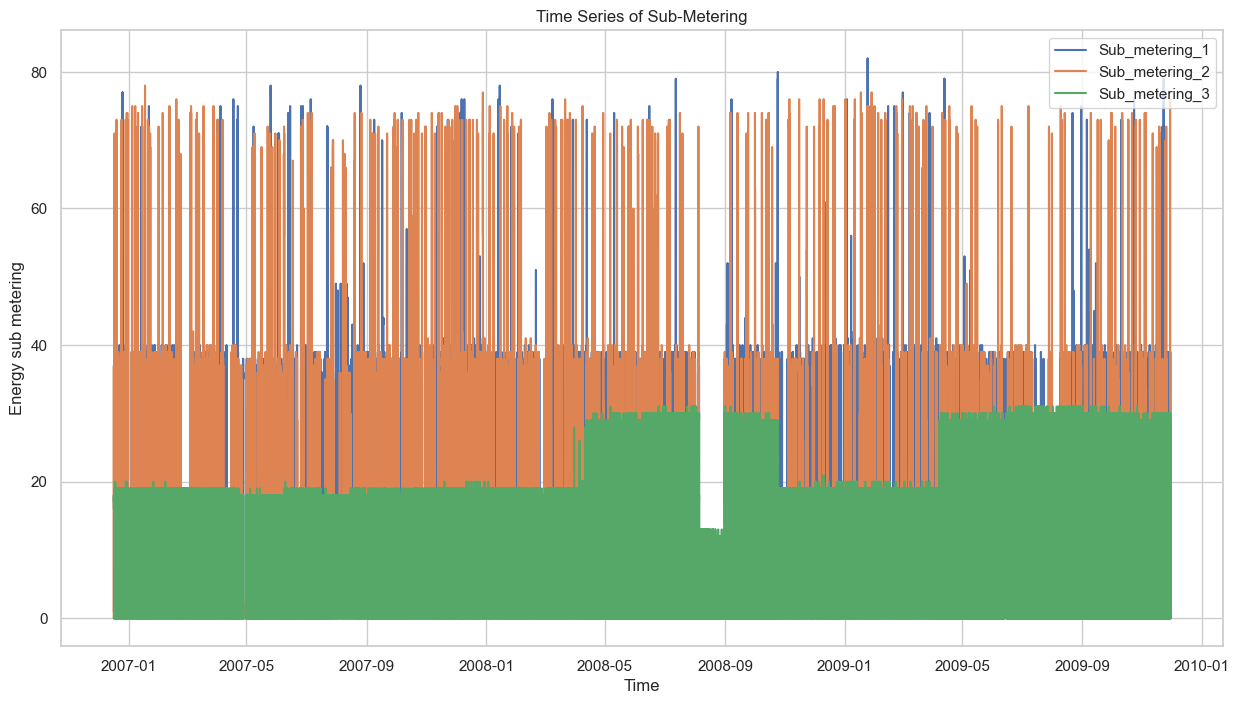

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(filtered_data['Datetime'], filtered_data['Sub_metering_1'], label='Sub_metering_1')
plt.plot(filtered_data['Datetime'], filtered_data['Sub_metering_2'], label='Sub_metering_2')
plt.plot(filtered_data['Datetime'], filtered_data['Sub_metering_3'], label='Sub_metering_3')
plt.title('Time Series of Sub-Metering')
plt.xlabel('Time')
plt.ylabel('Energy sub metering')
plt.legend()
plt.show()


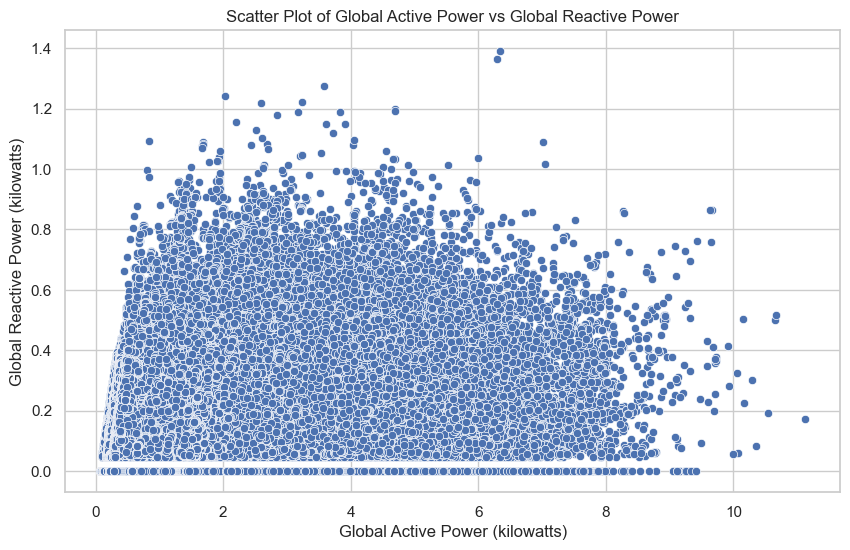

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Global_reactive_power', data=filtered_data)
plt.title('Scatter Plot of Global Active Power vs Global Reactive Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Global Reactive Power (kilowatts)')
plt.show()


C:\Users\devpa\AppData\Local\Temp\ipykernel_15776\1184630306.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = filtered_data.resample('M', on='Datetime').mean()


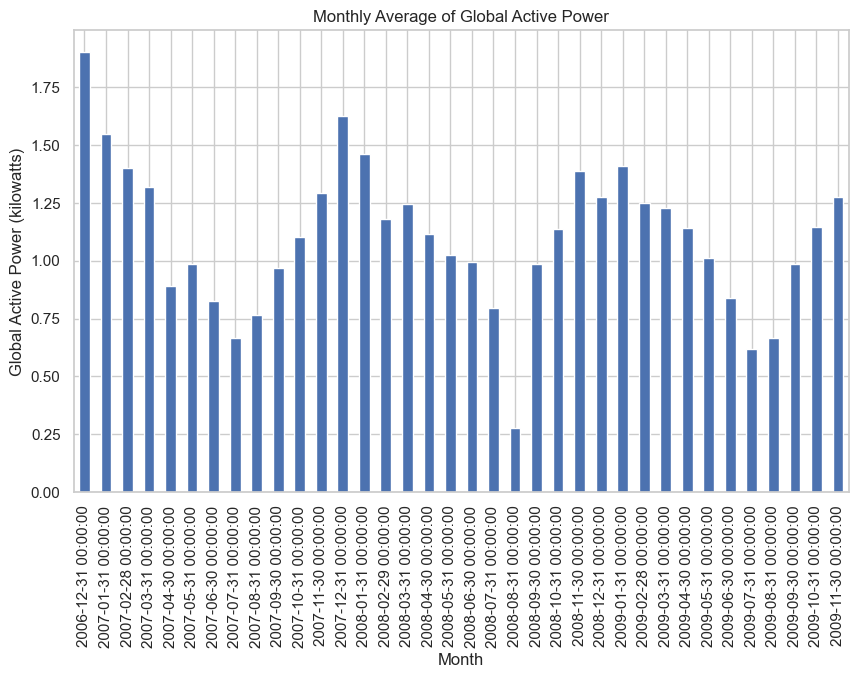

In [9]:
monthly_data = filtered_data.resample('M', on='Datetime').mean()

plt.figure(figsize=(10, 6))
monthly_data['Global_active_power'].plot(kind='bar')
plt.title('Monthly Average of Global Active Power')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()


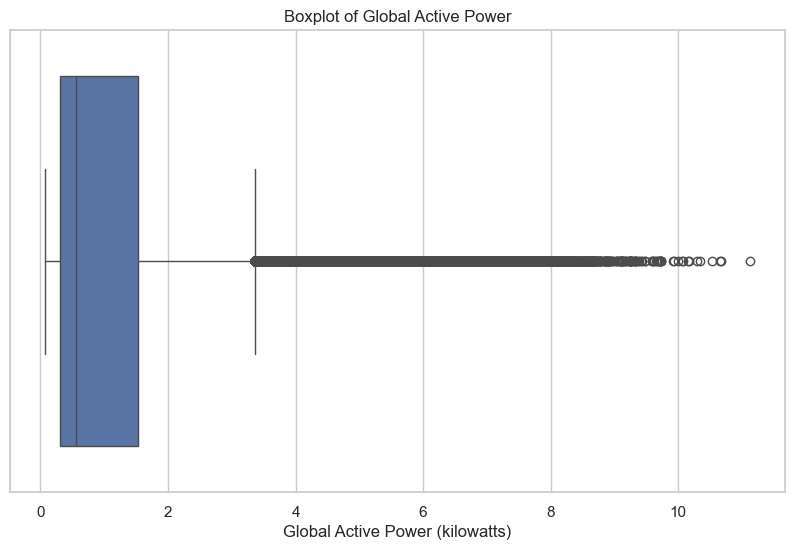

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Global_active_power', data=filtered_data)
plt.title('Boxplot of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.show()


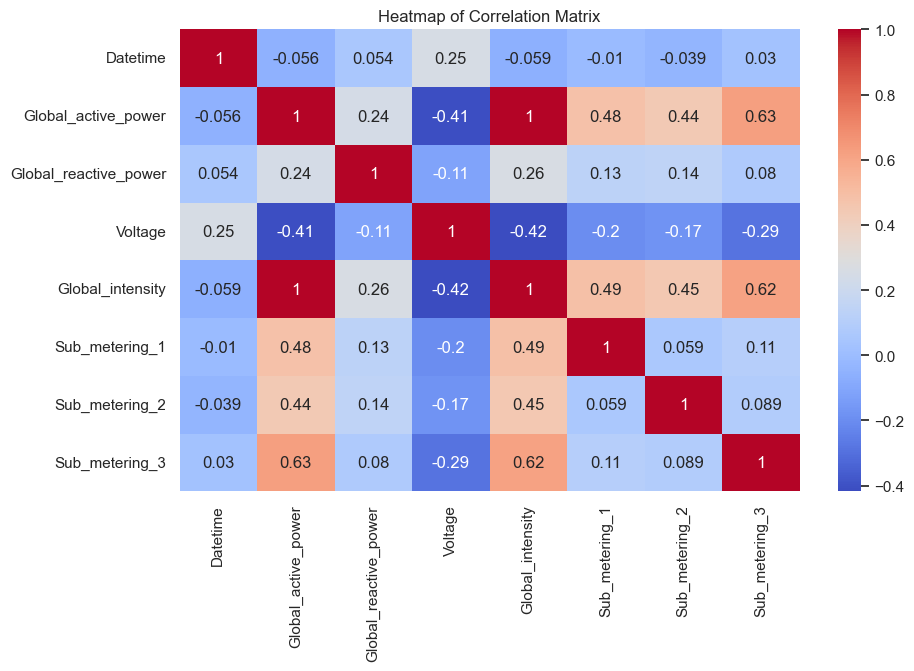

In [11]:
corr = filtered_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


C:\Users\devpa\AppData\Local\Temp\ipykernel_15776\129124464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['Global_active_power'], bins=50, kde=True)


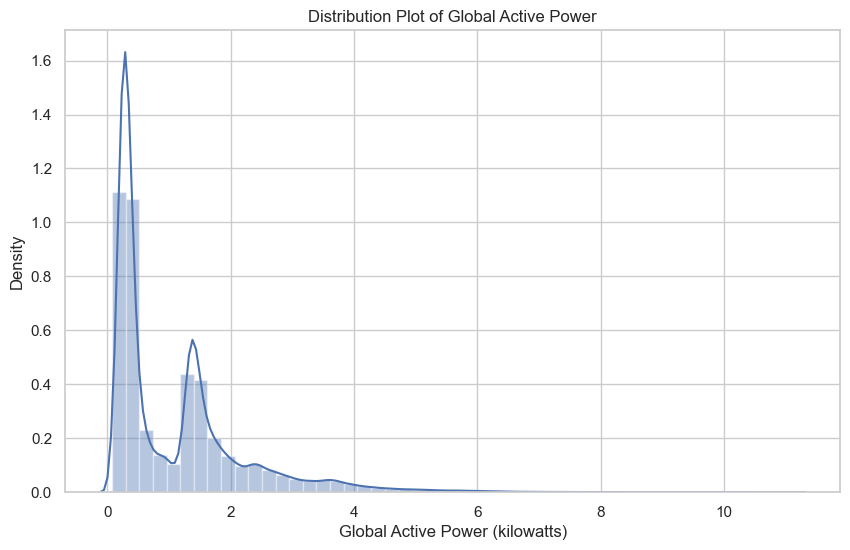

In [12]:
plt.figure(figsize=(10, 6))
sns.distplot(filtered_data['Global_active_power'], bins=50, kde=True)
plt.title('Distribution Plot of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Density')
plt.show()


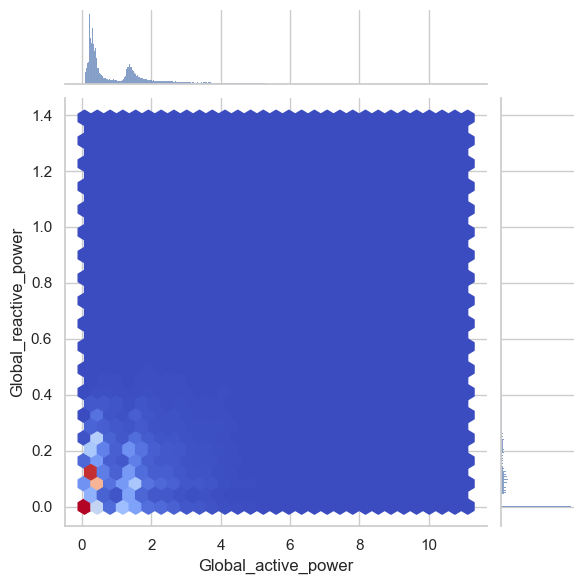

In [13]:
sns.jointplot(x='Global_active_power', y='Global_reactive_power', data=filtered_data, kind='hex', gridsize=30, cmap='coolwarm')
plt.show()


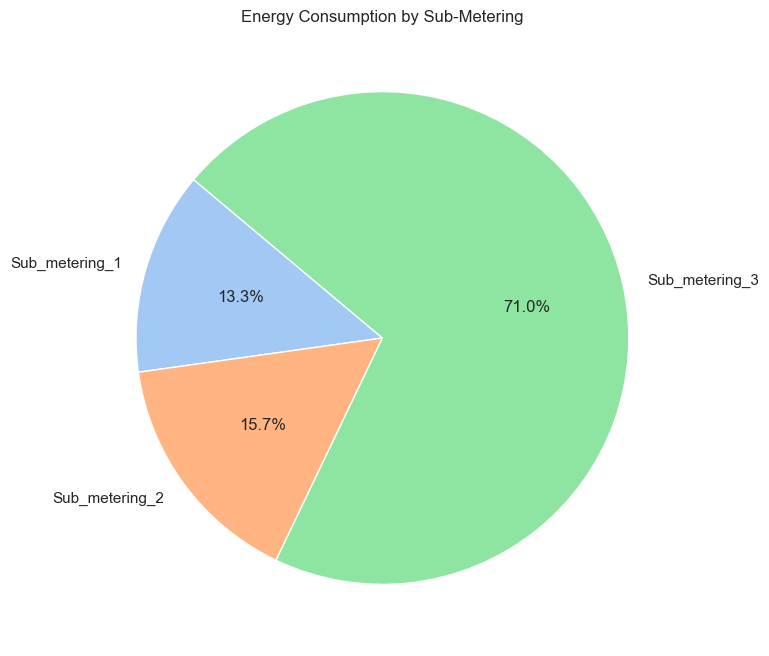

In [14]:
# Calculate the total consumption for each sub-metering
sub_metering_totals = {
    'Sub_metering_1': filtered_data['Sub_metering_1'].sum(),
    'Sub_metering_2': filtered_data['Sub_metering_2'].sum(),
    'Sub_metering_3': filtered_data['Sub_metering_3'].sum()
}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sub_metering_totals.values(), labels=sub_metering_totals.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Energy Consumption by Sub-Metering')
plt.show()
